In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [8]:
data = {'hours':[1,2,3,4,5],
        'pass':[0,0,0,1,1]}
df = pd.DataFrame(data)
X = df[['hours']]
y = df['pass']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
pipe1 = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe1.fit(X_train, y_train)

x_vals = np.linspace(df['hours'].min(), df['hours'].max(), 100).reshape(-1,1)
y_probs1 = pipe1.predict_proba(x_vals)[:,1]


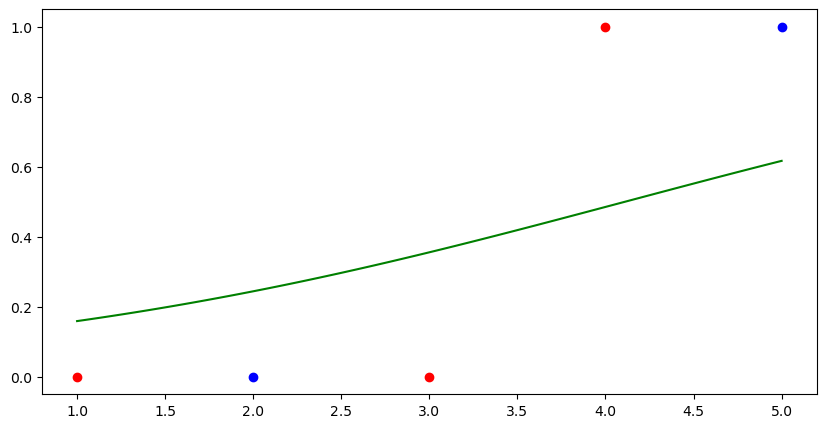

In [10]:
plt.figure(figsize=(10,5))

# Correct
plt.plot(x_vals, y_probs1, label="Correct: Train first, scale later", color='green')
plt.scatter(X_train, y_train, color='red', label="Train points")
plt.scatter(X_test, y_test, color='blue', label="Test points")


In [11]:
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)  # ❌ Scaling pehle pura data

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_probs2 = model2.predict_proba(np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1,1))[:,1]


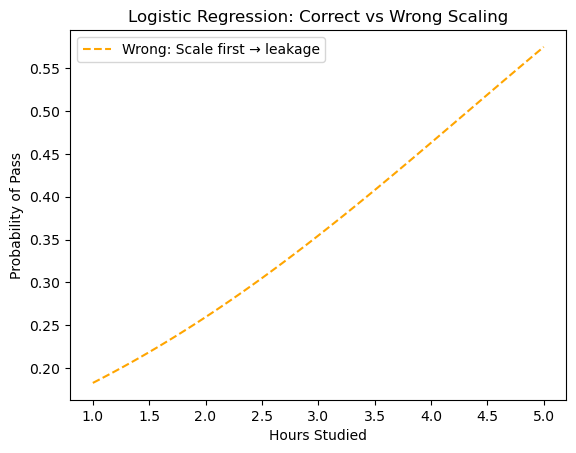

In [12]:
plt.plot(np.linspace(df['hours'].min(), df['hours'].max(), 100), y_probs2, label="Wrong: Scale first → leakage", color='orange', linestyle='--')

plt.xlabel("Hours Studied")
plt.ylabel("Probability of Pass")
plt.title("Logistic Regression: Correct vs Wrong Scaling")
plt.legend()
plt.show()